<a href="https://colab.research.google.com/github/skarki084/Computational-Math-Projects/blob/main/Primes_Project_Karki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1)

  Implement the Sieve of Sundaram:


  Algorithm:

  Input: positive integer n



*   $m = Floor \left( \frac{n-1}{2}\right)$
*   a list nums = [1,2,3,...m]
*   index $i = 1$


Repeat while $2i + 2i^2 \leq m$:

*   Let j = i
*   Repeat: while $ w = i + j + 2ij \leq m:
          - if w is in nums, then remove w from nums
          - Set j = j + 1
      
*   Set i = i + 1

Return list of values $2b + 1$ for each b in nums






In [ ]:
import math   # for sqrt and other math functions
import time   # for runtime analysis
import matplotlib.pyplot as plt  # for plotting
import random

In [ ]:
def sieve_sun(n):
  m = math.floor((n-1)/2)
  nums = list(range(1, m+1))
  i = 1

  while 2*i + 2*(i**2) <= m:
    j = i
    while i + j + 2*i*j <= m:
      if i + j + 2 *i*j in nums: #this checks if w is in nums
        nums[i + j + 2*i*j - 1]=0
      j = j + 1
    i = i + 1

  last_list=[2*b+1 for b in nums if b !=0] # add 2b+1 into this list if b is not 0

  return last_list

In [ ]:
sieve_sun(100)

[3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

Looks like the Sieve of Sundaram is implemented properly!



Now to compare the runtimes between the Sieve of Sundaram and Sieve of Eratosthenes

In [ ]:
def eratos(nMax):
  # start with a list 2, 3, 4, ..., nMax
  nums = list(range(2,nMax+1))

  i = 0 # index of smallest item in nums
  while nums[i] <= math.sqrt(nMax):
    # nums[i] is prime, so remove its multiples

    j = i+1 # the index of the number after nums[i]
    while j < len(nums):
      # if nums[j] is a multiple of nums[i], then remove nums[j]
      if nums[j] % nums[i] == 0:
        nums.pop(j)
      else:
        j += 1

    i += 1  # go to the next smallest item in nums

  # return the list of primes
  return nums

In [ ]:
def eratos_runtime(nMax):
  startTime = time.time()
  eratos(nMax)
  endTime = time.time()
  #print("runtime:", endTime - startTime)
  return endTime - startTime

def sunda_runtime(nMax):
  startTime = time.time()
  sieve_sun(nMax)
  endTime = time.time()
  #print("runtime:", endTime - startTime)
  return endTime - startTime

In [ ]:
eratos_runtime(100)

9.489059448242188e-05

In [ ]:
sunda_runtime(100)

5.269050598144531e-05

In [ ]:
eratos_runtime(10**4)

0.016271591186523438

In [ ]:
sunda_runtime(10**4)

0.4978656768798828

In [ ]:
eratos_times = [eratos_runtime(n) for n in range(2,1000)]

In [ ]:
sun_times = [sunda_runtime(n) for n in range(2,1000)]

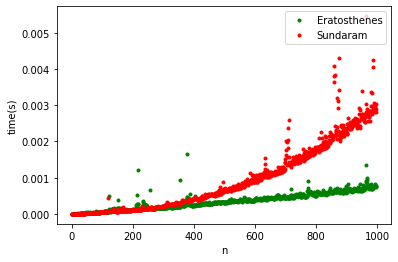

In [ ]:
plt.plot(eratos_times, 'g.', label = "Eratosthenes")
plt.plot(sun_times, 'r.', label = "Sundaram")
plt.xlabel("n")
plt.ylabel("time(s)")
plt.legend(loc = "upper right")

Looking at the plot above, we can see that the run time for each algorithm is similar up to n = 300. After this, the run time for Sundaram grows much faster. Eratosthenes is clearly the more efficient. I tried doing this analysis for n up to 1000, but the run times for Sundaram were so large that you could not see any change in the values of Eratosthenes.

Conjecture A:

Every even integer greater than 2 is the sum of two primes.


Testing the truth of this below:


The code below has two indexes looping over the prime values. A list of integers is made. The two prime values are added together. Then I take that value out of the list of integers by changing it to 0. If this Conjecture is true, then I should just have a list of 0's by the end of this. 

In [ ]:
list_primes = eratos(10000)
list_ints = list(range(4,10000,2)) #list of only even integers
for i in list_primes:#looping over both indexes
  for j in list_primes:
    sum = i + j
    if sum in list_ints: #checking if the sum is in list_int (in case it is already 0)
      num_index = list_ints.index(sum)
      list_ints[num_index] =0  #turn the sum into 0

list_ints.count(0)== len(list_ints) # checks if every item in list_ints is 0, which mean the conjecture holds for that number

True

**All even integers from 4 to 10,000 follow the conjecture. I stopped at 10,000 because this already took a couple minutes to compute. The conjecutre holds so far!**



---



Conjecture D:

All odd numbers greater than 1 are either prime, or can be expressed as the
sum of a prime and twice a square.


This is how I will test this conjecture:

I will get a list of odd integers, and turn the primes to 0's. I will then loop over a list of the twice squares and the list of primes. I will consider the sum of a twice square and prime. If this number is in the list of odds, I will turn it to 0. If this conjecture is true, my list of odds will only be 0's.

In [ ]:
prime_list = eratos(50)
odds_list = list(range(3,50+1,2))

for i in range(len(odds_list)): # make primes 0
  if prime_list.count(odds_list[i])==1:
    odds_list[i]=0

twice_squares = [2*n**2 for n in range(1, math.ceil(math.sqrt(50/2))**2)] # the range for this doesnt really matter, as long as its long enough, right now it is actually too long

for i in twice_squares: 
  for j in prime_list:
    sum = i + j
    if odds_list.count(sum)==1: # if the sum of twice_square and prime are in odds_list, make that entry 0
      num_index = odds_list.index(sum)
      odds_list[num_index] =0  #turn the sum into 0

odds_list

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

The conjecture is true up to 50!

In [ ]:
def check_conjecture_d(nMax):
  prime_list = eratos(nMax)
  odds_list = list(range(3,nMax + 1,2))

  for i in range(len(odds_list)):
    if prime_list.count(odds_list[i])==1:
      odds_list[i]=0

  twice_squares = [2*n**2 for n in range(1, math.ceil(math.sqrt(nMax/2))**2)]

  for i in twice_squares:
    for j in prime_list:
      sum = i + j
      if odds_list.count(sum)==1:
        num_index = odds_list.index(sum)
        odds_list[num_index] =0  #turn the sum into 0

  return odds_list

I made the code into a function to see if the conjecture holds true for more odd values.

In [ ]:
up_to_1000= check_conjecture_d(1000)

up_to_1000.count(0)

499

There were 499 odds in the list and now they are all 0, which means the conjecture holds up to n = 1000

In [ ]:
up_to_10000= check_conjecture_d(10000)

up_to_10000.count(0)

4997

It looks like there are two numbers in this list that are not odd or a sum of a prime and twice of a cube.

In [ ]:
for i in up_to_10000:
  if i!=0:
    print (i)

5777
5993


**5777 and 5993 are not prime or twice of a cube. This shows that Conjecture D is FALSE!** 

Conjecture C:

For every positive integer n, there exists at least one prime between n^2 and (n + 1)^2


Let's see if this conjecture is true:

In [ ]:
big_primes_list = eratos(10**6)


Testing if the code works below.
For a given n, I am checking if the numbers between n^2 and (n+1)^2 are present in big_primes_list. If so I print True. If i go through all the numbers between that interval, I will print false.


In [ ]:
n = 50
lower = n**2
upper = (n+1)**2
for i in range(lower, upper+1):
  if big_primes_list.count(i)>0:
    print("prime",i," is in between",lower, "and", upper)
    break

prime 2503  is in between 2500 and 2601


In [ ]:
def check_conjecture_c (n):
  lower = n**2
  upper = (n+1)**2
  for i in range(lower, upper+1):
    if big_primes_list.count(i)>0:
      return True
      break

  return False


The code above gives True or False for the conjecture for a given n. I can loop over a range of n's to see if there are any falses.

In [ ]:
check_conjecture_c(3)

True

In [ ]:
list_of_checks = [check_conjecture_c(h) for h in range(1,1000)]
list_of_checks.count(False)

0

**Integers n from 1 to 1000 satisfy the conjecture. If I try a bigger range of n values, the computation takes much too long (I tried up to n = 5000, but my code was still running after 30 mins). As far as I know, this conjecture may be true, because I do not have any evidence to say otherwise. Considering as n gets bigger, the range of values that we are searching for primes also increases, I believe this conjecture is true!**